<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/03_classification_using_NN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What are we going to cover in this nb:
* Architecture of a classification model
* Input shapes and output shapes
1. X: features/data (inputs)
2. y: labels (outputs)
    *  "What class do the inputs belong to?"
* Creating custom data to view and fit
* Steps in modelling for binary and mutliclass classification
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
            * Finding the best learning rate
        * Creating evaluation metrics
    * Fitting a model (getting it to find patterns in our data)
    * Improving a model
* The power of non-linearity
* Evaluating classification models
    * Visualizng the model ("visualize, visualize, visualize")
    * Looking at training curves
    * Compare predictions to ground truth (using our evaluation metrics)

**NOTE:**
**Output Activation: sigmoid used for Binary Classification, while Softmax is used for Multiclass Classification,**

**Loss function: Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow) for Binary Classification, Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow) for Multiclass Classification**

**Output shape: 1 output for Binary classification,
Tensor of output classes where O(i) = prob. of output being class i for multiclass classification**

### Architecture of a classification model

Input Layer
hidden layer
Output Layer

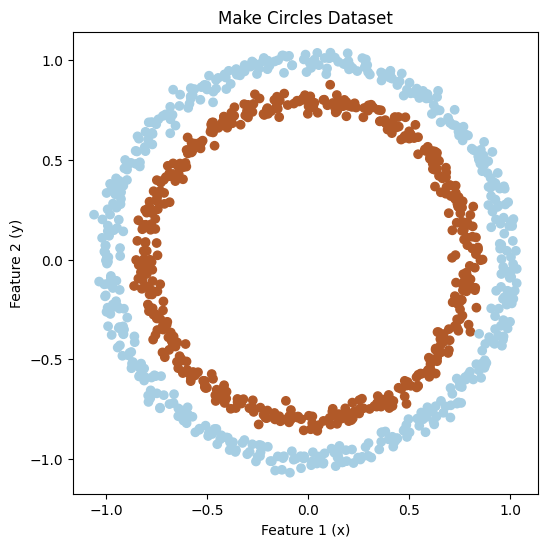

In [85]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000

# X, y = make_circles(n_samples,
#                     noise=0.05, factor=0.6, # radius of inner circle = factor * radius of outer circle
#                     random_state=42)

# radius of inner circle = factor * radius of outer circle
X, y = make_circles(n_samples, noise=0.03, random_state = 42)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Make Circles Dataset")
plt.xlabel("Feature 1 (x)")

plt.ylabel("Feature 2 (y)")
plt.show()

In [86]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [87]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

###Making dataset in pandas

In [88]:
import pandas as pd
df = pd.DataFrame({"X0": X[:,0],"X1": X[:,1],"y": y})

In [89]:
df

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [90]:
df.y.value_counts()

,count
y,
1,500
0,500


In [91]:
X.shape,y.shape #y is scalar for each data sample

((1000, 2), (1000,))

In [92]:
X.size #returns totalnumber of values contained in it

2000

In [93]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Creating the model, fitting it and evaluating it

In [95]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy']) # accuracy = how many labels were correctly predicted

model_1.fit(X_train, y_train,  epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5133 - loss: 0.8407
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 0.8263
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5120 - loss: 0.8134
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5076 - loss: 0.8020
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5018 - loss: 0.7919
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4994 - loss: 0.7829
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4971 - loss: 0.7750 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4963 - loss: 0.7680 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4897 - loss: 0.7618  
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4892 - loss: 0.7564 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4892 - loss: 0.7516 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.490


### Improving the model: new model with an additional dense layer

In [96]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5025 - loss: 0.6997   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5045 - loss: 0.6916 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5377 - loss: 0.6862 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5034 - loss: 0.6826 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 0.6801 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5103 - loss: 0.6783 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5314 - loss: 0.6769 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5344 - loss: 0.6758 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5353 - loss: 0.6750 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5304 - loss: 0.6743 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5281 - loss: 0.6738 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [97]:
model_2.evaluate(X, y) #returns loss and metrics

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7324 - loss: 0.6236  


[0.6227683424949646, 0.7450000047683716]

### Changing the activation function

In [98]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.Input(shape = (2,)), #input layer
  tf.keras.layers.Dense(16, activation = 'tanh'), #hidden layers
  tf.keras.layers.Dense(4, activation = 'tanh'),
  tf.keras.layers.Dense(1, activation = 'sigmoid') # activation fn in output : sigmoid for binary classification
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_3.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4827 - loss: 0.6942   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4788 - loss: 0.6940 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4680 - loss: 0.6939 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4665 - loss: 0.6938 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4759 - loss: 0.6936 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4763 - loss: 0.6935 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4883 - loss: 0.6934 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4968 - loss: 0.6933 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5108 - loss: 0.6932 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 0.6931 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5446 - loss: 0.6930  
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

In [99]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5973 - loss: 0.6894  


[0.6908325552940369, 0.5730000138282776]

**doesn't work well**

### visualizing the model: seeing its decision boundary so as to see if it is going wrong

In [100]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.6)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


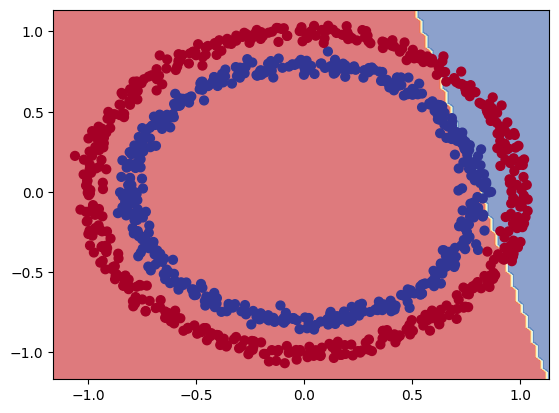

In [101]:
plot_decision_boundary(model_1, X, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


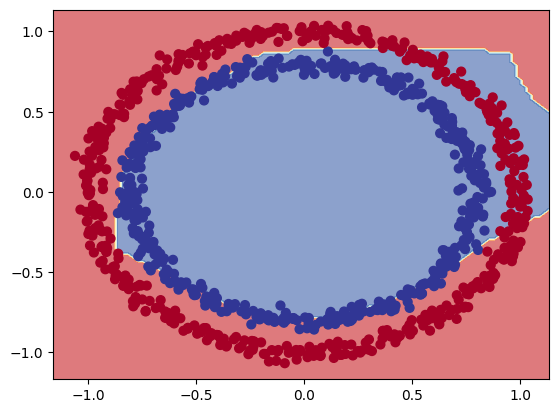

In [102]:
plot_decision_boundary(model_2, X, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classifcation...


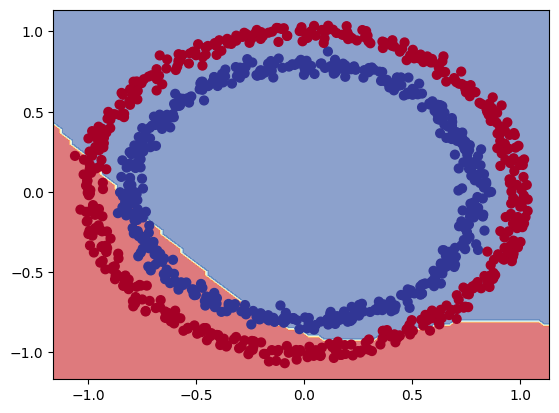

In [103]:
plot_decision_boundary(model_3, X, y)

**Note: last model(model_3) is overcomplicating th decision boundary**

#### TRYING OUT A SIMPLER MODEL as model_3 is overcomplicating the decision boundary

In [104]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Input(shape = (2,)),
  tf.keras.layers.Dense(3, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),
                metrics=["accuracy"])

history = model_4.fit(X_train, y_train, epochs=100)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5018 - loss: 2.6179  
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5093 - loss: 0.7050 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5135 - loss: 0.6913
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5137 - loss: 0.6885 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5174 - loss: 0.6876 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5498 - loss: 0.6870
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5535 - loss: 0.6864
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5444 - loss: 0.6858 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5580 - loss: 0.6852
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.6845 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5722 - loss: 0.6838 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


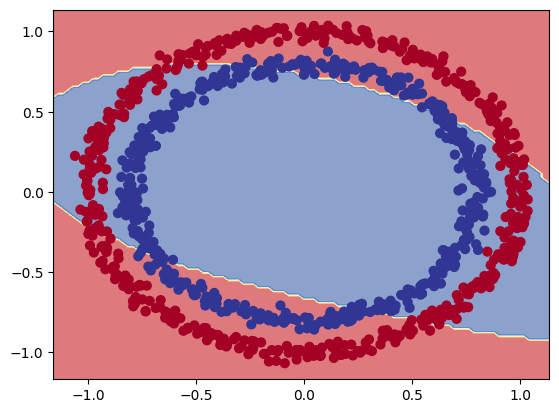

In [105]:
plot_decision_boundary(model_4, X, y)

In [106]:
model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6163 - loss: 0.6134  


[0.6186029314994812, 0.6100000143051147]

Text(0.5, 1.0, 'model 4 training curves')

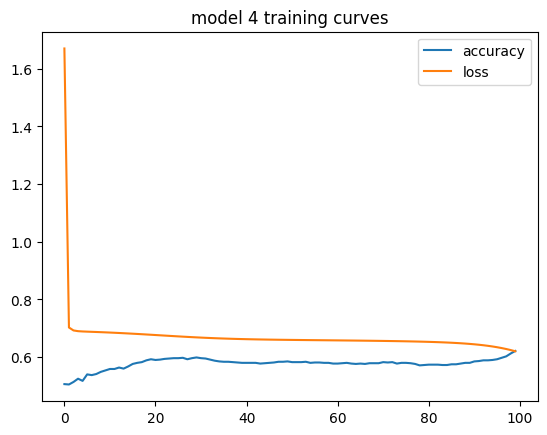

In [107]:
pd.DataFrame(history.history).plot()
plt.title("model 4 training curves")

**Note: changing the activation functions in output layer is important, like in classification its better to have sigmoid/tanh/softmax activation functions**

In [108]:
model_1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12 (52.00 B)

In [109]:
model_2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123 (496.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [110]:
model_3.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123 (496.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [111]:
model_4.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (64.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [112]:
model_1.predict(X_test)[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.47941697],
       [0.47941697],
       [0.47941697],
       [0.47941697],
       [0.47941697],
       [0.47941697],
       [0.5355904 ],
       [0.5454545 ],
       [0.47941697],
       [0.47941697]], dtype=float32)

In [113]:
model_2.predict(X_test)[:10].squeeze()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([0.51270515, 0.48048097, 0.5705892 , 0.43667418, 0.47048575,
       0.48412815, 0.53312606, 0.5497102 , 0.56780124, 0.47826055],
      dtype=float32)

In [114]:
model_3.predict(X_test)[:10].squeeze()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([0.5241805 , 0.52195394, 0.49711084, 0.52495813, 0.50233424,
       0.50436115, 0.5161089 , 0.5148867 , 0.49604195, 0.5213472 ],
      dtype=float32)

In [115]:
model_4.predict(X_test)[:10].squeeze()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0.56690985, 0.33512336, 0.5399223 , 0.37108272, 0.51600593,
       0.6028852 , 0.38299346, 0.5063123 , 0.53634316, 0.31845957],
      dtype=float32)

**🔑Note: Linearity and non-linearity(using activation fns) is a key feature of NN**

### finding the ideal learning rate

where the loss decreases most during training
> Steps:
* A learning rate **callback** - is a mechanism in deep learning that dynamically adjusts the learning rate during training.
* Another model
* modified loss curve plot


**lr callback**

In [116]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = 'Adam',
                metrics = ['accuracy'])

# creating a lr callback - works during model training

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/100))


history = model_5.fit(X_train, y_train,
                      epochs = 100,
                      callbacks = [lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4904 - loss: 0.6996 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5016 - loss: 0.6945 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4987 - loss: 0.6917 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5048 - loss: 0.6900 - learning_rate: 0.0011
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5185 - loss: 0.6888 - learning_rate: 0.0011
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5454 - loss: 0.6878 - learning_rate: 0.0011
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5609 - loss: 0.6869 - learning_rate: 0.0011
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5675 - loss: 0.6859 - learning_rate: 0.0012
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5756 - loss: 0.6848 - learning_rate: 0.0012
Epoch 10/100
25/25 

In [117]:
model_5.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9973 - loss: 0.0275  


[0.029393425211310387, 0.9950000047683716]

<Axes: >

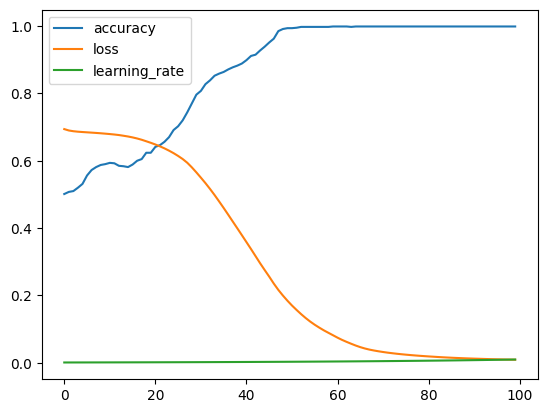

In [118]:
pd.DataFrame(history.history).plot()

In [119]:
lr = 1e-4*10**(tf.range(100, dtype = tf.float32)/100)

In [120]:
lr

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([9.99999975e-05, 1.02329301e-04, 1.04712853e-04, 1.07151922e-04,
       1.09647823e-04, 1.12201844e-04, 1.14815361e-04, 1.17489755e-04,
       1.20226439e-04, 1.23026868e-04, 1.25892548e-04, 1.28824948e-04,
       1.31825669e-04, 1.34896283e-04, 1.38038435e-04, 1.41253753e-04,
       1.44543970e-04, 1.47910832e-04, 1.51356115e-04, 1.54881651e-04,
       1.58489318e-04, 1.62181008e-04, 1.65958685e-04, 1.69824358e-04,
       1.73780078e-04, 1.77827940e-04, 1.81970085e-04, 1.86208708e-04,
       1.90546067e-04, 1.94984459e-04, 1.99526228e-04, 2.04173804e-04,
       2.08929603e-04, 2.13796200e-04, 2.18776142e-04, 2.23872106e-04,
       2.29086771e-04, 2.34422871e-04, 2.39883273e-04, 2.45470874e-04,
       2.51188641e-04, 2.57039559e-04, 2.63026770e-04, 2.69153476e-04,
       2.75422848e-04, 2.81838264e-04, 2.88403156e-04, 2.95120932e-04,
       3.01995140e-04, 3.09029536e-04, 3.16227757e-04, 3.23593646e-04,
       3.31131101e-04, 3.3884

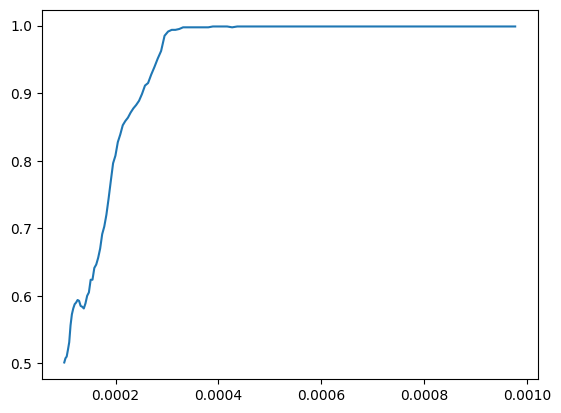

In [121]:
plt.plot(lr, history.history['accuracy'])
plt.show()

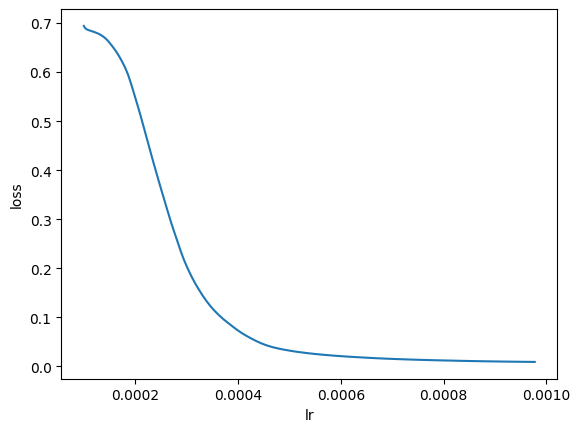

In [122]:
plt.plot(lr, history.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')
plt.show()

#### lr where loss decreases the most is 0.0003 -> ideal learning rate

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


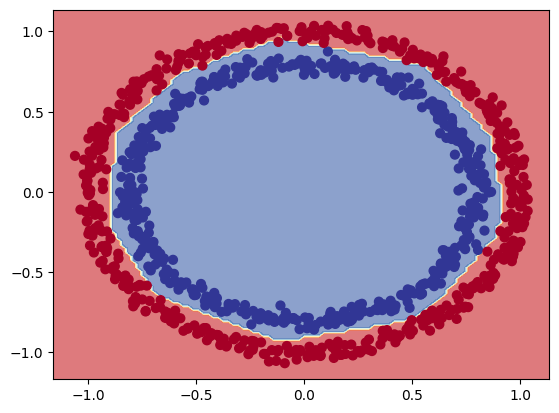

In [123]:
plot_decision_boundary(model_5, X, y)

In [124]:
y_pred = model_5.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [125]:
y_pred[:10].squeeze()

array([9.9917704e-01, 9.0495713e-02, 9.9957550e-01, 8.1620235e-03,
       9.9855274e-01, 9.9316418e-01, 8.5923260e-05, 1.5981976e-05,
       9.9783134e-01, 1.9037442e-02], dtype=float32)

In [126]:
tf.round(y_pred)[:10] #.squeeze()

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

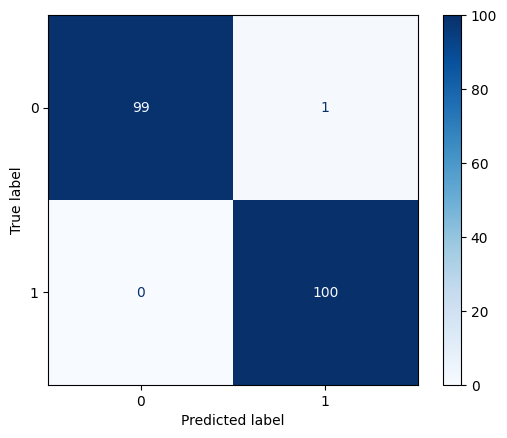

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = y_pred.squeeze()
y_pred = tf.round(y_pred)
cm = confusion_matrix(y_test.squeeze(), y_pred)

# plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Multi-class Classification
Dataset: https://github.com/zalandoresearch/fashion-mnist

> each image is in grayscale

> 28 x 28 = dim of each image

> plt.imshow() shows image with colormap 'virdis'

In [128]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [129]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

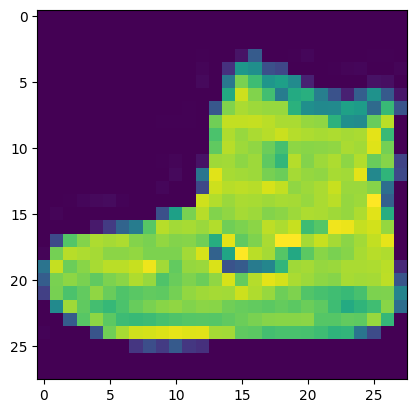

In [130]:
plt.imshow(train_data[0])

In [131]:
train_data[0].shape

(28, 28)

In [132]:
img = np.array(train_data[0])
img[0][0]

0

In [133]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [134]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

**Labels<br>
Each training and test example is assigned to one of the following labels:**

**Label	Description <br>
0	T-shirt/top <br>
1	Trouser <br>
2	Pullover <br>
3	Dress <br>
4	Coat <br>
5	Sandal <br>
6	Shirt <br>
7	Sneaker <br>
8	Bag <br>
9	Ankle boot**

In [135]:
# plotting the category to its name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

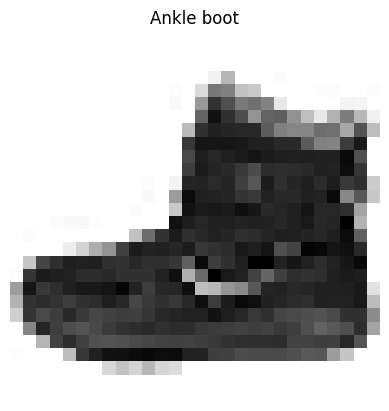

In [136]:
# viewing image in grayscale

plt.imshow(train_data[0], cmap = plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.axis(False)

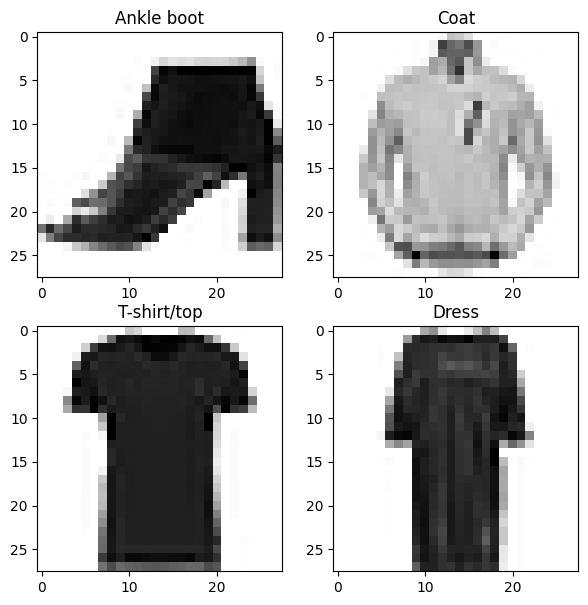

In [137]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    # plt.axis(False)


#### **for traditional NNs, dense layers expect 1D input vectors, each neuron is treated as individual input**
**Input: 28 x 28 -> (784, )<br>
Hidden Layers: ----<br>
Output Layer: 10 for 10 labels(where output(ith neuron) = prob of input image belonging to class 'i')<br>**


**Output activation: softmax<br>
loss: binary cross entropy<br>
optimizer: Adam/SGD**



#### Loss: categorical binary entropy, sparse categorical cross entropy

In [146]:
# MAKING THE MODEL
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(42)

model_1_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer( reshape 28 x 28 )
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# as predicted vector is of size 10 for an input samples thus same should hold for real output vector
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)

train_labels_one_hot, test_labels_one_hot

(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

#### > Trying  binary cross entropy loss function: requires labels to be one hot encoded

In [147]:

model_1_1.compile(loss = 'categorical_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['accuracy'])

# show loss over both train and test data
history_1_1 = model_1_1.fit(train_data, train_labels_one_hot, epochs = 40, validation_data = (test_data, test_labels_one_hot))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2080 - loss: 3.8369 - val_accuracy: 0.3321 - val_loss: 1.7473
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3558 - loss: 1.6609 - val_accuracy: 0.4233 - val_loss: 1.4222
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4236 - loss: 1.3575 - val_accuracy: 0.4581 - val_loss: 1.2541
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4769 - loss: 1.2211 - val_accuracy: 0.5076 - val_loss: 1.1642
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5268 - loss: 1.1075 - val_accuracy: 0.5384 - val_loss: 1.1003
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5353 - loss: 1.0863 - val_accuracy: 0.5506 - val_loss: 1.0533
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5458 - loss: 1.0442 - val_accuracy: 0.5569 - val_loss: 1.0276
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5555 - loss: 1.0230 - 

#### > Trying sparse categorical cross entropy: requires labels to be integers

In [148]:
# MAKING THE MODEL
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(42)

model_1_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer( reshape 28 x 28 )
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# train_labels_one_hot, test_labels_one_hot
lr_scheduler =
model_1_2.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

# show loss over both train and test data
history_1_2 = model_1_2.fit(train_data, train_labels, epochs = 20, validation_data = (test_data, test_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1202 - loss: 2.8278 - val_accuracy: 0.1825 - val_loss: 2.1116
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1633 - loss: 2.0863 - val_accuracy: 0.2101 - val_loss: 1.9249
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2004 - loss: 1.9108 - val_accuracy: 0.2529 - val_loss: 1.7514
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2327 - loss: 1.7590 - val_accuracy: 0.2777 - val_loss: 1.6716
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2514 - loss: 1.7134 - val_accuracy: 0.2773 - val_loss: 1.6431
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2706 - loss: 1.6517 - val_accuracy: 0.2909 - val_loss: 1.6261
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2995 - loss: 1.6199 - val_accuracy: 0.3243 - val_loss: 1.6102
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3139 - loss: 1.6186 - 